<a href="https://colab.research.google.com/github/mees/calvin/blob/main/RL_with_CALVIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Reinforcement Learning with CALVIN</h1>

The **CALVIN** simulated benchmark is perfectly suited for training agents with reinforcement learning, in this notebook we will demonstrate how to integrate your agents to these environments.

## Installation
The first step is to install the CALVIN github repository such that we have access to the packages

In [1]:
#Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
####Env Setting
#You may run this only once
%cd /content/drive/MyDrive/calvinoffon
!git clone https://github.com/mees/calvin_env.git
%cd /content/drive/MyDrive/calvinoffon/calvin_env
!git clone https://github.com/lukashermann/tacto.git

/content/drive/MyDrive/calvinoffon
fatal: destination path 'calvin_env' already exists and is not an empty directory.
/content/drive/MyDrive/calvinoffon/calvin_env
fatal: destination path 'tacto' already exists and is not an empty directory.


In [ ]:
# Install packages
%cd /content/drive/MyDrive/calvinoffon/calvin_env/tacto/
!pip3 install -e .
%cd /content/drive/MyDrive/calvinoffon/calvin_env
!pip3 install -e .
!pip3 install -U numpy

/content/drive/MyDrive/calvinoffon/calvin_env/tacto
Obtaining file:///content/drive/MyDrive/calvinoffon/calvin_env/tacto
  Preparing metadata (setup.py) ... done
  Using cached PyOpenGL-3.1.0-py3-none-any.whl
  Attempting uninstall: tacto
    Found existing installation: tacto 0.0.3
    Uninstalling tacto-0.0.3:
      Successfully uninstalled tacto-0.0.3
  Running setup.py develop for tacto
/content/drive/MyDrive/calvinoffon/calvin_env
Obtaining file:///content/drive/MyDrive/calvinoffon/calvin_env
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.8/195.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.7 MB/s eta 0:00:00
  Building editable for calvin_env (pyprojec

In [ ]:
# Run this to check if the installation was succesful
%cd /content/drive/MyDrive/calvinoffon/calvin_env
from calvin_env.envs.play_table_env import PlayTableSimEnv
# 안되면 런타임 세션 다시시작 후, 이 셀부터 다시 실행

/content/drive/MyDrive/calvinoffon/calvin_env


/content/drive/MyDrive/calvinoffon/calvin_env/calvin_env/envs/play_table_env.py:289: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="../../conf", config_name="config_data_collection")


## Loading the environment
After the installation has finished successfully, we can start using the environment for reinforcement Learning.
To be able to use the environment we need to have the appropriate configuration that define the desired features, for this example, we will load the static and gripper camera.

In [ ]:
%cd /content/drive/MyDrive/calvinoffon
from hydra import initialize, compose

with initialize(config_path="./calvin_env/conf/"):
  cfg = compose(config_name="config_data_collection.yaml", overrides=["cameras=static_and_gripper"])
  cfg.env["use_egl"] = False
  cfg.env["show_gui"] = False
  cfg.env["use_vr"] = False
  cfg.env["use_scene_info"] = True
  print(cfg.env)

/content/drive/MyDrive/calvinoffon


<ipython-input-2-73f67effeb19>:4: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="./calvin_env/conf/"):
/usr/local/lib/python3.10/dist-packages/hydra/_internal/defaults_list.py:251: UserWarning: In 'config_data_collection.yaml': Defaults list is missing `_self_`. See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/default_composition_order for more information
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/hydra/core/default_element.py:124: UserWarning: In 'vr_input/vr_controller/vive': Usage of deprecated keyword in package header '# @package _group_'.
See https://hydra.cc/docs/1.2/upgrades/1.0_to_1.1/changes_to_package_header for more information
  deprecation_warning(


{'_target_': 'calvin_env.envs.play_table_env.PlayTableSimEnv', '_recursive_': False, 'cameras': '${cameras}', 'seed': 0, 'bullet_time_step': 240.0, 'use_vr': False, 'show_gui': False, 'robot_cfg': '${robot}', 'scene_cfg': '${scene}', 'use_scene_info': True, 'use_egl': False, 'control_freq': 30}


The environment has similar structure to traditional OpenAI Gym environments.

*   We can restart the simulation with the *reset* function.
*   We can perform an action in the environment with the *step* function.
*   We can visualize images taken from the cameras in the environment by using the *render* function.





In [ ]:
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

##Lets see the data configuration

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
for i in range(1):
  # The action consists in a pose displacement (position and orientation)
  action_displacement = np.random.uniform(low=-1, high=1, size=6)
  # And a binary gripper action, -1 for closing and 1 for oppening
  action_gripper = np.random.choice([-1, 1], size=1)
  action = np.concatenate((action_displacement, action_gripper), axis=-1)
  observation, reward, done, info = env.step(action)
  #The observation is given as a dictionary with different values
  for i in observation.keys():
    print(f'Observation Keys : {i}')
    if isinstance(observation[i],dict):
      for j in observation[i].keys():
        print(f'-----{i} Keys : {j}-----')
        print(observation[i][j].shape)
    else:
      print(f'----------------')
      print(observation[i].shape)

  #The action space
  """
  ['actions'] (dtype=np.float32, shape=(7,))
    tcp position (3): x,y,z in absolute world coordinates
    tcp orientation (3): euler angles x,y,z in absolute world coordinates
    gripper_action (1): binary (close = -1, open = 1)

  ['rel_actions'] (dtype=np.float32, shape=(7,))
    tcp position (3): x,y,z in relative world coordinates normalized and clipped to (-1, 1) with scaling factor 50
    tcp orientation (3): euler angles x,y,z in relative world coordinates normalized and clipped to (-1, 1) with scaling factor 20
    gripper_action (1): binary (close = -1, open = 1)
  """
  rgb = env.render(mode="rgb_array")[:,:,::-1]
  #display.clear_output(wait=True)
  #display.display(plt.gcf())
  plt.imshow(rgb)
  #cv2_imshow(rgb)

KeyboardInterrupt: 

KeyboardInterrupt: 

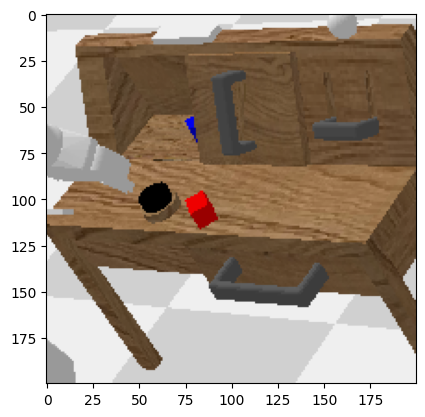

In [ ]:
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

##Lets see simulation result using random control

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
for i in range(100):
  # The action consists in a pose displacement (position and orientation)
  action_displacement = np.random.uniform(low=-1, high=1, size=6)
  # And a binary gripper action, -1 for closing and 1 for oppening
  action_gripper = np.random.choice([-1, 1], size=1)
  action = np.concatenate((action_displacement, action_gripper), axis=-1)
  observation, reward, done, info = env.step(action)
  #The observation is given as a dictionary with different values
  rgb = env.render(mode="rgb_array")[:,:,:]#
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.imshow(rgb)
  #cv2_imshow(rgb)

In [ ]:
##데이터셋 /calvinoffon/calvin_env/dataset/에 저장
## dataset 폴더 없으면 !mkdir /content/drive/MyDrive/calvinoffon/calvin_env/dataset
!pwd
%cd /content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/validation
!ls

/root
/content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/validation
'=0.2.1'	       episode_0553987.npz   episode_0554408.npz   episode_0554829.npz
 episode_0553567.npz   episode_0553988.npz   episode_0554409.npz   episode_0554830.npz
 episode_0553568.npz   episode_0553989.npz   episode_0554410.npz   episode_0554831.npz
 episode_0553569.npz   episode_0553990.npz   episode_0554411.npz   episode_0554832.npz
 episode_0553570.npz   episode_0553991.npz   episode_0554412.npz   episode_0554833.npz
 episode_0553571.npz   episode_0553992.npz   episode_0554413.npz   episode_0554834.npz
 episode_0553572.npz   episode_0553993.npz   episode_0554414.npz   episode_0554835.npz
 episode_0553573.npz   episode_0553994.npz   episode_0554415.npz   episode_0554836.npz
 episode_0553574.npz   episode_0553995.npz   episode_0554416.npz   episode_0554837.npz
 episode_0553575.npz   episode_0553996.npz   episode_0554417.npz   episode_0554838.npz
 episode_0553576.npz   episode_0553997.npz   

In [ ]:
###각각의 npz 파일은 episode_{n}, n번째 step 정보를 나타냄
example = np.load('episode_0553962.npz')
for i in example.keys():
  print(i)
  print(example[i].shape)

actions
(7,)
rel_actions
(7,)
robot_obs
(15,)
scene_obs
(24,)
rgb_static
(200, 200, 3)
rgb_gripper
(84, 84, 3)
rgb_tactile
(160, 120, 6)
depth_static
(200, 200)
depth_gripper
(84, 84)
depth_tactile
(160, 120, 2)


In [ ]:
###Language Embeddings
lang_embeddings = np.load('lang_annotations/embeddings.npy',allow_pickle=True).item()
print("__________Language Instructions________")
for i in lang_embeddings.keys():
  print(i)

print(f"------Language Instruction : 'rotate_red_block_right-------")
for i in lang_embeddings['rotate_red_block_right'].keys():
  print(f'{i}')
  if(i == 'emb'):
    print(lang_embeddings['rotate_red_block_right'][i].shape)
  else:
    print(lang_embeddings['rotate_red_block_right'][i])


__________Language Instructions________
rotate_red_block_right
rotate_red_block_left
rotate_blue_block_right
rotate_blue_block_left
rotate_pink_block_right
rotate_pink_block_left
push_red_block_right
push_red_block_left
push_blue_block_right
push_blue_block_left
push_pink_block_right
push_pink_block_left
move_slider_left
move_slider_right
open_drawer
close_drawer
lift_red_block_table
lift_blue_block_table
lift_pink_block_table
lift_red_block_slider
lift_blue_block_slider
lift_pink_block_slider
lift_red_block_drawer
lift_blue_block_drawer
lift_pink_block_drawer
place_in_slider
place_in_drawer
push_into_drawer
stack_block
unstack_block
turn_on_lightbulb
turn_off_lightbulb
turn_on_led
turn_off_led
------Language Instruction : 'rotate_red_block_right-------
emb
(1, 1, 384)
ann
['take the red block and rotate it to the right']


In [ ]:
###Language Annotations
lang_annotation_dicts = np.load('lang_annotations/auto_lang_ann.npy',allow_pickle=True).item()
print("----Annotation Dict Keys-----")
for i in lang_annotation_dicts.keys():
  print(f"__{i}___")
  for j in lang_annotation_dicts[i].keys():
    print(f"_____________{j}_____________")
    if(j == 'emb'):
      print(lang_annotation_dicts[i][j].shape)
    else:
       print(lang_annotation_dicts[i][j])

###Based on these, in the episode, there exist 8 tasks

----Annotation Dict Keys-----
__language___
_____________ann_____________
['lift the red block from the table', 'turn on the light bulb', 'in the slider pick up the blue block', 'in the cabinet grasp the blue block', 'slide down the switch', 'put it in the slider', 'slide right the pink block', 'in the slider grasp the blue block']
_____________task_____________
['lift_red_block_table', 'turn_on_lightbulb', 'lift_blue_block_slider', 'lift_blue_block_slider', 'turn_off_lightbulb', 'place_in_slider', 'push_pink_block_right', 'lift_blue_block_slider']
_____________emb_____________
(8, 1, 384)
__info___
_____________episodes_____________
[]
_____________indx_____________
[(554046, 554110), (553636, 553700), (553693, 553757), (553691, 553755), (554474, 554538), (554110, 554145), (553916, 553961), (553701, 553765)]


In [ ]:
##Example Trajectory Of A Task
trajectory_lang_data = []

for i,task in enumerate(lang_annotation_dicts['language']['task']):
  embedding = lang_annotation_dicts['language']['emb'][i,:,:]
  traj_idx = lang_annotation_dicts['info']['indx'][i]
  trajectory_lang_data.append({'task':task,'emb':embedding,'traj_idx':traj_idx})

###Take First Trajectory
target_traj = trajectory_lang_data[0]
traj_obs = []
traj_gripper_obs = []
traj_init_obs = None
traj_actions = []
for i in range(target_traj['traj_idx'][0],target_traj['traj_idx'][1]):
  example = np.load(f'episode_0{i}.npz')
  ##Extract Only Visual Observation from .npz file
  if(i==target_traj['traj_idx'][0]):
    traj_init_obs = {'robot_obs':example['robot_obs'],'scene_obs':example['scene_obs']}
  traj_obs.append(example['rgb_static'])
  traj_gripper_obs.append(example['rgb_gripper'])
  traj_actions.append(example['rel_actions'])

In [ ]:
##Observe Dataset
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

#print(f''target_traj['emb']')
for i,j in zip(traj_obs,traj_gripper_obs):
  display.clear_output(wait=True)
  display.display(plt.gcf())
  print(f"Target Trajectory - Task:{target_traj['task']}")
  print(f"Episode-IDs - {target_traj['traj_idx']}")
  plt.subplot(1,2,1)
  plt.imshow(i)
  plt.subplot(1,2,2)
  plt.imshow(j)

여기는 실시간 하는 법!

In [ ]:
##Control Using actions of the Offline Dataset
import time
import hydra
import numpy as np
import os
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from IPython import display

##Lets see simulation result using random control

env = hydra.utils.instantiate(cfg.env)
observation = env.reset()
print(env.get_state_obs())

##데이터의 initial point로 configuration 바꾸기!!!
observation = env.reset(scene_obs=traj_init_obs['scene_obs'],robot_obs=traj_init_obs['robot_obs'])
print(env.get_state_obs())

WARNING uncommitted modified files: calvin_env/scripts/convert_gripper_actions.py,calvin_env/scripts/render_low_freq.py,data/franka_panda/meshes/visual/~$Assem1.SLDASM,data/franka_panda/meshes/visual/~$FRANKA_Finger.SLDPRT,data/franka_panda/meshes/visual/~$finger.SLDPRT,egl_check/build.sh,tacto
disconnecting id 3 from server{'robot_obs': array([ 0.02586889, -0.2313129 ,  0.5712808 ,  3.09045411, -0.02908596,
        1.50013585,  0.07999963, -1.21779124,  1.03987629,  2.11978254,
       -2.34205014, -0.87015899,  1.64119093,  0.55344929,  1.        ]), 'scene_obs': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.89120579e-20,
        0.00000000e+00,  0.00000000e+00,  9.93221827e-03, -1.35050261e-01,
        4.59980893e-01, -2.00969817e-03, -4.36011528e-04, -7.30874836e-01,
       -1.62979373e-01,  9.79775552e-02,  4.60019821e-01, -7.41180638e-03,
       -1.60898503e-03, -2.29274037e+00,  7.98394360e-02,  8.67275785e-02,
        4.59999343e-01, -6.05178858e-03, -1.52431147e-

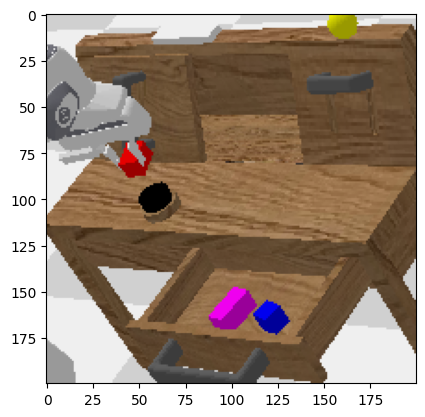

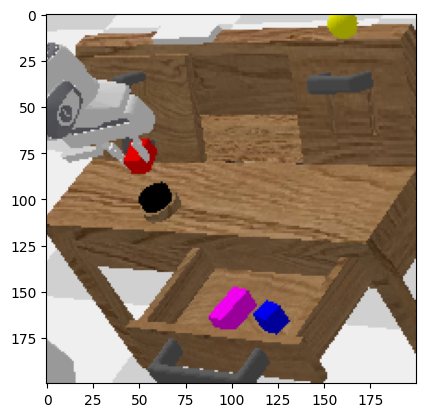

In [ ]:
observation = env.reset(scene_obs=traj_init_obs['scene_obs'],robot_obs=traj_init_obs['robot_obs'])
print(env.get_state_obs())

for action in traj_actions:
  # The action consists in a pose displacement (position and orientation)
  # NOTE : action_displacement = action[:6], action_gripper = action[-1]
  observation, reward, done, info = env.step(action)
  #The observation is given as a dictionary with different values
  rgb = env.render(mode="rgb_array")[:,:,:]#::-1
  display.clear_output(wait=True)
  display.display(plt.gcf())
  plt.imshow(rgb)
  #cv2_imshow(rgb)

##  Custom environment for Reinforcement Learning
There are some aspects that needs to be defined to be able to use it for reinforcement learning, including:

1.   Observation space
2.   Action space
3.   Reward function

We are going to create a Custom environment that extends the **PlaytableSimEnv** to add these requirements. <br/>
The specific task that will be solved is called "move_slider_left", here you can find a [list of possible tasks](https://github.com/mees/calvin_env/blob/main/conf/tasks/new_playtable_tasks.yaml) that can be evaluated using CALVIN.



In [ ]:
from gym import spaces
from calvin_env.envs.play_table_env import PlayTableSimEnv

class SlideEnv(PlayTableSimEnv):
    def __init__(self,
                 tasks: dict = {},
                 **kwargs):
        super(SlideEnv, self).__init__(**kwargs)
        # For this example we will modify the observation to
        # only retrieve the end effector pose
        self.action_space = spaces.Box(low=-1, high=1, shape=(7,))
        self.observation_space = spaces.Box(low=-1, high=1, shape=(7,))
        # We can use the task utility to know if the task was executed correctly
        self.tasks = hydra.utils.instantiate(tasks)

    def reset(self):
        obs = super().reset()
        self.start_info = self.get_info()
        return obs

    def get_obs(self):
        """Overwrite robot obs to only retrieve end effector position"""
        robot_obs, robot_info = self.robot.get_observation()
        return robot_obs[:7]

    def _success(self):
        """ Returns a boolean indicating if the task was performed correctly """
        current_info = self.get_info()
        task_filter = ["move_slider_left"]
        task_info = self.tasks.get_task_info_for_set(self.start_info, current_info, task_filter)
        return 'move_slider_left' in task_info

    def _reward(self):
        """ Returns the reward function that will be used
        for the RL algorithm """
        reward = int(self._success()) * 10
        r_info = {'reward': reward}
        return reward, r_info

    def _termination(self):
        """ Indicates if the robot has reached a terminal state """
        success = self._success()
        done = success
        d_info = {'success': success}
        return done, d_info

    def step(self, action):
            """ Performing a relative action in the environment
                input:
                    action: 7 tuple containing
                            Position x, y, z.
                            Angle in rad x, y, z.
                            Gripper action
                            each value in range (-1, 1)

                            OR
                            8 tuple containing
                            Relative Joint angles j1 - j7 (in rad)
                            Gripper action
                output:
                    observation, reward, done info
            """
            # Transform gripper action to discrete space
            env_action = action.copy()
            env_action[-1] = (int(action[-1] >= 0) * 2) - 1

            # for using actions in joint space
            if len(env_action) == 8:
                env_action = {"action": env_action, "type": "joint_rel"}

            self.robot.apply_action(env_action)
            for i in range(self.action_repeat):
                self.p.stepSimulation(physicsClientId=self.cid)
            obs = self.get_obs()
            info = self.get_info()
            reward, r_info = self._reward()
            done, d_info = self._termination()
            info.update(r_info)
            info.update(d_info)
            return obs, reward, done, info

In [ ]:
##Train With Soft Actor-Critic Algorithm
%cd /content/drive/MyDrive/calvinoffon
!git clone https://github.com/pranz24/pytorch-soft-actor-critic.git

/content/drive/MyDrive/calvinoffon
Cloning into 'pytorch-soft-actor-critic'...
remote: Enumerating objects: 566, done.
remote: Total 566 (delta 0), reused 0 (delta 0), pack-reused 566
Receiving objects: 100% (566/566), 1010.84 KiB | 4.45 MiB/s, done.
Resolving deltas: 100% (340/340), done.


# Training an RL agent
After generating the wrapper training a reinforcement learning agent is straightforward, for this example we will use stable baselines 3 agents

In [ ]:
###Train Online

!pip3 install stable_baselines3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.3/182.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 37.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-many

In [ ]:
##Train With Soft Actor-Critic Algorithm
%cd /content/drive/MyDrive/calvinoffon

To train the agent we create an instance of our new environment and send it to the stable baselines agent to learn a policy.


> Note: the example uses Soft Actor Critic (SAC) which is one of the state of the art algorithm for off-policy RL.



In [ ]:
import gym
import numpy as np
from stable_baselines3 import SAC
!pip install shimmy>=0.2.1

new_env_cfg = {**cfg.env}
new_env_cfg["tasks"] = cfg.tasks
new_env_cfg.pop('_target_', None)
new_env_cfg.pop('_recursive_', None)
env = SlideEnv(**new_env_cfg)
model = SAC("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000, log_interval=4)


WARNING uncommitted modified files: calvin_env/scripts/convert_gripper_actions.py,calvin_env/scripts/render_low_freq.py,data/franka_panda/meshes/visual/~$Assem1.SLDASM,data/franka_panda/meshes/visual/~$FRANKA_Finger.SLDPRT,data/franka_panda/meshes/visual/~$finger.SLDPRT,egl_check/build.sh,tacto
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/usr/local/lib/python3.10/dist-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


disconnecting id 3 from server


In [ ]:
##Language Qunatized Encoder
import torch
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=None):
        super().__init__()
        if(hidden_dim is None):
          hidden_dim = lang_dim

        self.language_MLP = torch.nn.Sequential(
            torch.nn.Linear(lang_dim, hidden_dim),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, hidden_dim)
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_dim, outpout_dim)
        )

        def forward(self, x):
          return self.language_MLP(x)

class State2QuatizedVecEncoder(nn.Module):
    def __init__(self, state_dim, hidden_dim,enc_dim):  #quantized_out_dim
        super().__init__()

        self.quantized_layer = nn.ModuleList(MLP(state_dim,hidden_dim,hidden_dim=384) for i in range(enc_dim))

    def forward(self, x):
        B,D = x.size()
        quantized_vec = []
        for i in self.quantized_layer:
            quantized_vec.append(i(x).unsqueeze(1))

        ###quantized_vec is now a len(enc_dim) list of (B,1,hidden_dim) neural_network

        return torch.cat(quantized_vec,dim=1) # (B,enc_dim,hidden_dim) output

class State_and_Language_Pair_Encoder(nn.Module):
    def __init__(self, state_dim, lang_dim, enc_dim, hidden_dim):
        super().__init__()

        self.language_encoder = MLP(lang_dim,hidden_dim)
        self.state_quantizer = StateQuantizedVecEncoder(state_dim,hidden_dim,enc_dim)

    def forward(self, state, lang_instructions):
        ##inputs state : (B,D), lang_structions : (B,L)

        lang_emb = self.language_encoder(lang_instructions) # (B,hidden_dim)
        quantized_vecs = self.state_quantizer(state)# (B,enc_dim,hidden_dim)

        cos_sim = torch.cosine_similarity(quantized_vecs,lang_emb,dim=-1) # (B,enc_dim)
        return cos_sim

In [ ]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 1.7 MB/s eta 0:00:00


In [ ]:
### Word Embedding Vector Visualization ###

%cd /content/drive/MyDrive/calvinoffon/calvin_env/dataset
from calvin_dataset import CALVIN_dataset
%cd

data = CALVIN_dataset(data_path = "/content/drive/MyDrive/calvinoffon/data/training.npz")
# language_reduction 함수 실행 후 self.lang_instruction, self.X_new_final, self.sentences update
data.language_reduction()

/content/drive/MyDrive/calvinoffon/calvin_env/dataset
disconnecting id 0 from server
/root


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when poss

<ipython-input-41-33d07d5f3ede>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c = color, alpha = a, label = label)


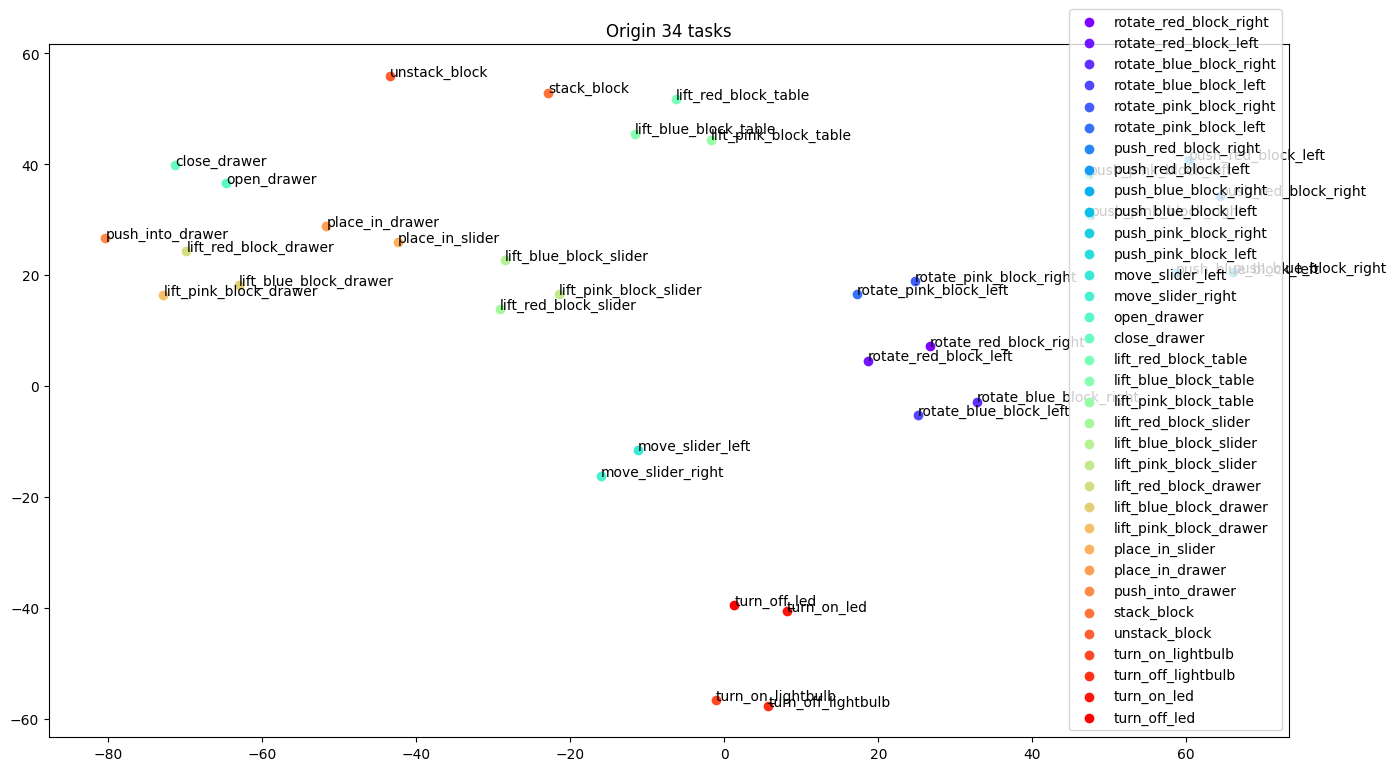

<ipython-input-41-33d07d5f3ede>:46: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c = color, alpha = a, label = label)


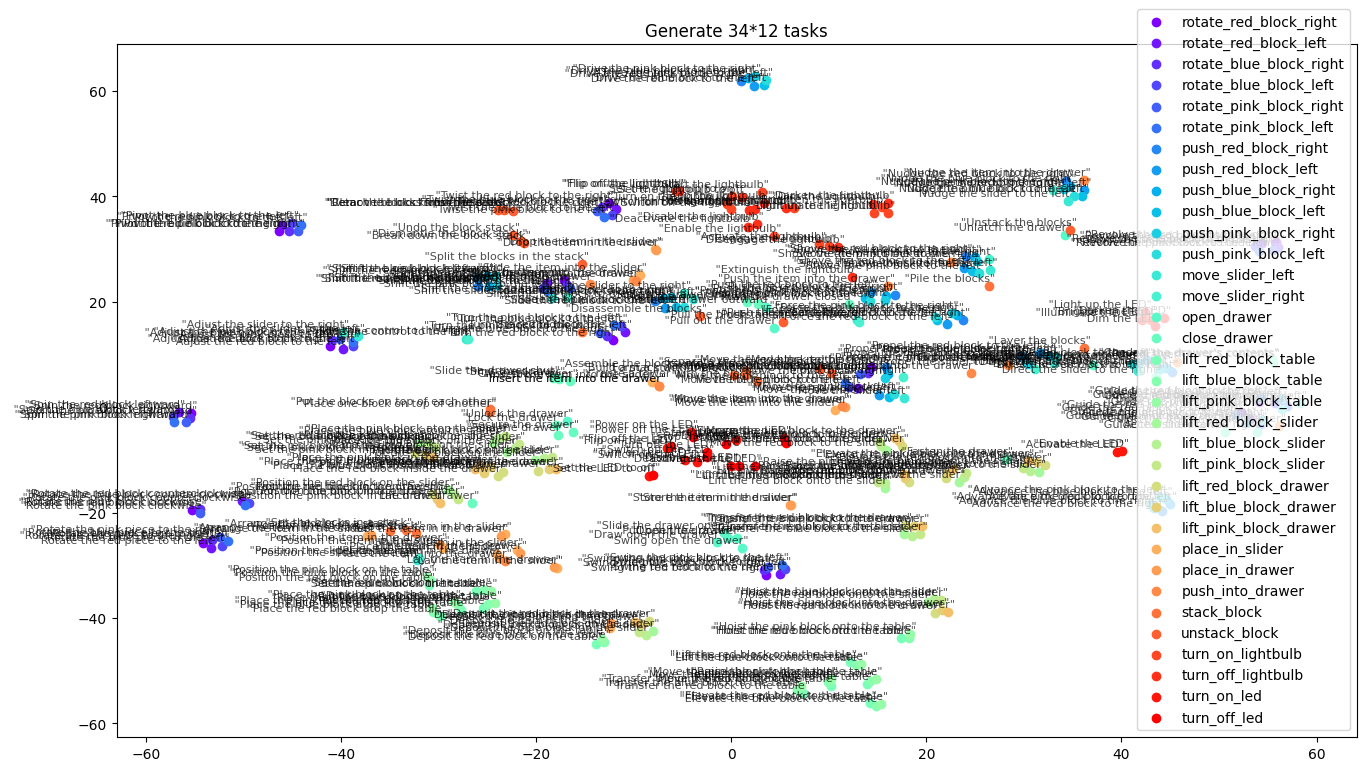

<ipython-input-41-33d07d5f3ede>:87: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c = color, alpha = a, label = label)


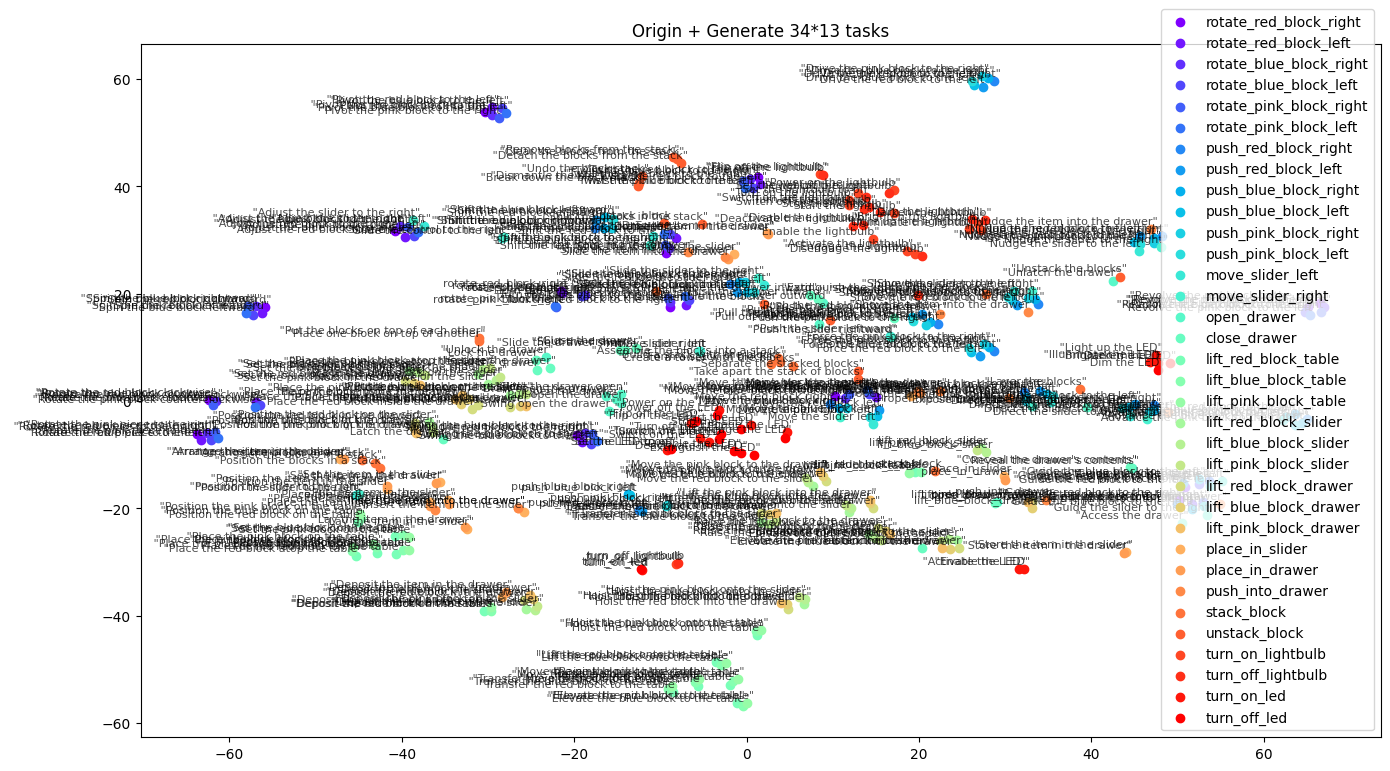

In [ ]:
### Word Embedding Vector Visualization ###

from sklearn.manifold import TSNE
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

# Original 34 task에 대한 Visualization
embedding_clusters = data.reduced_lang_emb

model = TSNE(perplexity = 7, n_components= 2, init = "pca", n_iter = 5000, random_state=32)
modified_data = model.fit_transform(embedding_clusters)

def tsne_plot(title, labels, embedding_clusters, task_clusters, a = 1):
    plt.figure(figsize=(16,9))
    col = cm.rainbow(np.linspace(0,1,len(labels)))

    for label, embeddings, tasks, color in zip(labels, embedding_clusters, task_clusters, col):
        x = embeddings[0]
        y = embeddings[1]
        plt.scatter(x, y, c = color, alpha = a, label = label)
        plt.annotate(tasks, xy = (x, y))

    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

tsne_plot(title = "Origin 34 tasks", labels = data.lang_instruction, embedding_clusters = modified_data, task_clusters = data.lang_instruction)

# Generate 된 34*12 개의 task에 대한 Visualization
embedding_clusters = (data.X_new_final[34:]).reshape(34,12,-1)   # (Gen 34*12, 200)
task_list = np.array(data.sentences).reshape(34,12) # List containing 34*12 tasks

model = TSNE(perplexity = 10, n_components= 2, init = "pca", n_iter = 5000, random_state=32)
modified_data = model.fit_transform(embedding_clusters.reshape(34*12, -1)).reshape(34,12,2)

def tsne_plot(title, labels, embedding_clusters, task_clusters, a = 1):
    plt.figure(figsize=(16,9))
    col = cm.rainbow(np.linspace(0,1,len(labels)))

    for label, embeddings, tasks, color in zip(labels, embedding_clusters, task_clusters, col):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c = color, alpha = a, label = label)
        for i, task in enumerate(tasks):
            plt.annotate(task, alpha = 0.7, xy = (x[i], y[i]), xytext = (5,2), textcoords = 'offset points', ha = 'right', va = 'bottom', size = 8)

    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

tsne_plot(title = "Generate 34*12 tasks", labels = data.lang_instruction, embedding_clusters = modified_data, task_clusters = task_list)


# Original + Generate 된 34*13개의 task에 대한 Visualization

# Data Preprocessing
embedding_clusters = data.X_new_final   # (Origin 34 + Gen 34*12, 200)
embedding_box = np.zeros((34,13,embedding_clusters.shape[-1]))
for i in range(34*13):
    if i // 34 == 0:
        embedding_box[i, 0] = embedding_clusters[i]
    else:
        embedding_box[(i-34)//12, 1 + (i-34)%12] = embedding_clusters[i]

task_list = data.lang_instruction + data.sentences # List containing 34*13 tasks
task_box = [[0 for j in range(13)]for i in range(34)]
for i in range(34*13):
    if i // 34 == 0:
        task_box[i][0] = task_list[i]
    else:
        task_box[(i-34)//12][1 + (i-34)%12] = task_list[i]

# t-SNE
model = TSNE(perplexity = 10, n_components= 2, init = "pca", n_iter = 5000, random_state=32)
modified_data = model.fit_transform(embedding_box.reshape(34*13, -1)).reshape(34,13,2)

def tsne_plot(title, labels, embedding_clusters, task_clusters, a = 1):
    plt.figure(figsize=(16,9))
    col = cm.rainbow(np.linspace(0,1,len(labels)))

    for label, embeddings, tasks, color in zip(labels, embedding_clusters, task_clusters, col):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c = color, alpha = a, label = label)
        for i, task in enumerate(tasks):
            plt.annotate(task, alpha = 0.7, xy = (x[i], y[i]), xytext = (5,2), textcoords = 'offset points', ha = 'right', va = 'bottom', size = 8)

    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

tsne_plot(title = "Origin + Generate 34*13 tasks", labels = data.lang_instruction, embedding_clusters = modified_data, task_clusters = task_box)




/content/drive/MyDrive/calvinoffon/calvin_env/dataset
/root


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
<ipython-input-42-d7b2aee6ecdf>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x, y, c = color, alpha = a, label = label)


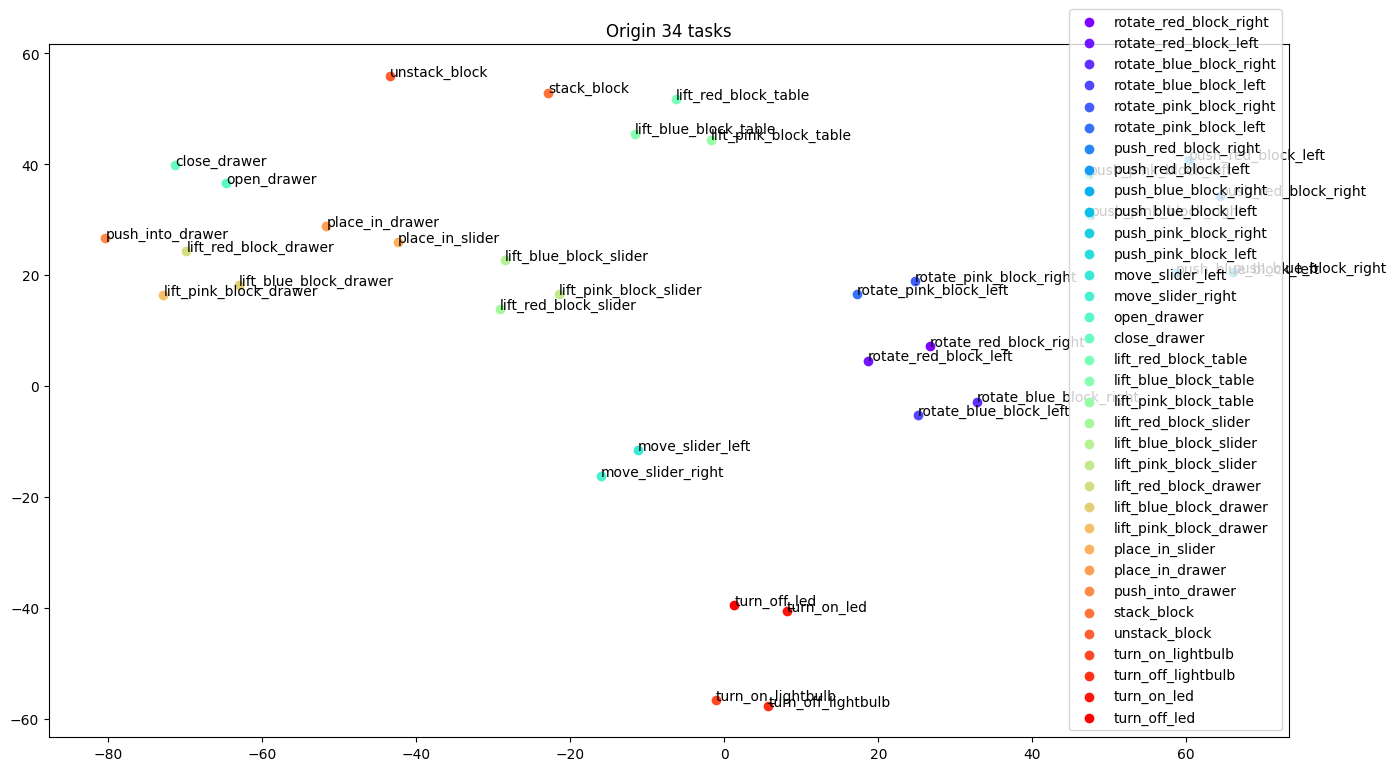

In [ ]:
#trajectory마다 state encoding, z,l t-SNE로 Viusalization
%cd /content/drive/MyDrive/calvinoffon/calvin_env/dataset
from calvin_dataset import CALVIN_dataset
%cd
data = CALVIN_dataset(data_path = "/content/drive/MyDrive/calvinoffon/data/training.npz")
data.language_reduction()  # language_reduction 함수 실행 후 self.lang_instruction, self.X_new_final, self.sentences update

from sklearn.manifold import TSNE
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

embedding_clusters = data.reduced_lang_emb

model = TSNE(perplexity = 7, n_components= 2, init = "pca", n_iter = 5000, random_state=32)
modified_data = model.fit_transform(embedding_clusters)

def tsne_plot(title, labels, embedding_clusters, task_clusters, a = 1):
    plt.figure(figsize=(16,9))
    col = cm.rainbow(np.linspace(0,1,len(labels)))

    for label, embeddings, tasks, color in zip(labels, embedding_clusters, task_clusters, col):
        x = embeddings[0]
        y = embeddings[1]
        plt.scatter(x, y, c = color, alpha = a, label = label)
        plt.annotate(tasks, xy = (x, y))

    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

tsne_plot(title = "Origin 34 tasks", labels = data.lang_instruction, embedding_clusters = modified_data, task_clusters = data.lang_instruction)


In [ ]:
# import numpy as np
# %cd /content/drive/MyDrive/calvinoffon/calvin_env/dataset
# from calvin_dataset import CALVIN_dataset
# %cd
# data = CALVIN_dataset(data_path = "/content/drive/MyDrive/calvinoffon/data/training.npz")
# data.language_reduction()

lang_annotation_dicts = np.load('/content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/validation/lang_annotations/auto_lang_ann.npy',allow_pickle=True).item()
task_list = [task for task in lang_annotation_dicts['language']['task']]
task_embedding_idx = [data.get_task_id(i) for i in task_list]
task_embedding_list = [data.reduced_lang_emb[i] for i in task_embedding_idx]
# lang_annotation_dicts["info"]["indx"]에 각 task 별 episode 시작과 끝이 저장되어있음
print(data.lang_instruction)

['rotate_red_block_right', 'rotate_red_block_left', 'rotate_blue_block_right', 'rotate_blue_block_left', 'rotate_pink_block_right', 'rotate_pink_block_left', 'push_red_block_right', 'push_red_block_left', 'push_blue_block_right', 'push_blue_block_left', 'push_pink_block_right', 'push_pink_block_left', 'move_slider_left', 'move_slider_right', 'open_drawer', 'close_drawer', 'lift_red_block_table', 'lift_blue_block_table', 'lift_pink_block_table', 'lift_red_block_slider', 'lift_blue_block_slider', 'lift_pink_block_slider', 'lift_red_block_drawer', 'lift_blue_block_drawer', 'lift_pink_block_drawer', 'place_in_slider', 'place_in_drawer', 'push_into_drawer', 'stack_block', 'unstack_block', 'turn_on_lightbulb', 'turn_off_lightbulb', 'turn_on_led', 'turn_off_led']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/calvinoffon")
sys.path.append("/content/drive/MyDrive/calvinoffon/calvin_env")

In [ ]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/content/drive/MyDrive/calvinoffon/calvin_env/tacto',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/MyDrive/calvinoffon',
 '/content/drive/MyDrive/calvinoffon',
 '/content/drive/MyDrive/calvinoffon/calvin_env']

In [ ]:
##Train Offline Using Soft Actor Critic Algorithm
%cd '/content/drive/MyDrive/calvinoffon'
!python offline_train_script.py

/content/drive/MyDrive/calvinoffon/calvin_env/dataset/calvin_debug_dataset/validation
2024-06-02 07:50:14.557646: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-02 07:50:14.557693: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-02 07:50:14.559031: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-02 07:50:15.676793: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in versio